In [97]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
%matplotlib inline

In [74]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [75]:
X = df.iloc[:,2:4].values
y = df.iloc[:,4].values

### Train test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

### Scaling

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
sc_X = MinMaxScaler(feature_range=(0, 1))

In [80]:
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [81]:
print(X_train,"\n-------------------------------\n",X_test)

[[0.61904762 0.17777778]
 [0.33333333 0.77777778]
 [0.47619048 0.25925926]
 [0.33333333 0.88888889]
 [0.80952381 0.04444444]
 [0.83333333 0.65925926]
 [0.5        0.2       ]
 [0.47619048 0.34074074]
 [0.42857143 0.25925926]
 [0.42857143 0.35555556]
 [0.4047619  0.07407407]
 [0.4047619  0.25925926]
 [0.57142857 0.42962963]
 [0.69047619 0.25185185]
 [0.97619048 0.1037037 ]
 [0.73809524 0.37037037]
 [0.64285714 0.85925926]
 [0.30952381 0.54814815]
 [0.66666667 0.4962963 ]
 [0.69047619 0.26666667]
 [0.19047619 0.        ]
 [1.         0.64444444]
 [0.47619048 0.71851852]
 [0.52380952 0.68148148]
 [0.57142857 0.28148148]
 [0.4047619  0.32592593]
 [0.71428571 0.19259259]
 [0.71428571 0.88148148]
 [0.47619048 0.72592593]
 [0.26190476 0.98518519]
 [0.19047619 0.        ]
 [1.         0.2       ]
 [0.14285714 0.02962963]
 [0.57142857 0.99259259]
 [0.66666667 0.6       ]
 [0.23809524 0.32592593]
 [0.5        0.6       ]
 [0.23809524 0.54814815]
 [0.54761905 0.42222222]
 [0.64285714 0.08148148]


### Perceptron Model

In [11]:
class Perceptron(object):

    def __init__(self, no_of_features, epochs, learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_features + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return np.where(summation>0,1,0)

    def fit(self, training_inputs, labels):
        i=0
        while i<= self.epochs:
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
            i=i+1

In [84]:
class Perceptron_Learning(object):

    def __init__(self, no_of_features, learning_rate):
        #self.epochs = no_of_epochs
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_features)
        self.bias = 0
           
    def predict(self, data):
        sum = np.dot(data, self.weights) + self.bias
        return np.where(sum>0,1,0)

    def fit_function(self, train_data, train_labels):
            for data, label in zip(train_data, train_labels):
                prediction = self.predict(data)
                self.weights += (label - prediction) * data * self.learning_rate
                self.bias += self.learning_rate * (label - prediction)

In [32]:
def Perceptron_Learning(no_of_features, no_of_epochs, learning_rate):
  features = no_of_features
  epochs = no_of_epochs
  weights = np.zeros(features)
  #bias = 0

  def predict(data):
    sum = np.dot(data, weights) #+ bias
    return np.where(sum>0,1,0)

  def fit_function(train_data, train_labels):
    i = 0;
    while i <= epochs:
      for data, label in zip(train_data, train_labels):
        prediction = predict(data)
        weights += (label - prediction) * learning_rate * data
        #bias += (label - prediction) * learning_rate
      i+=1


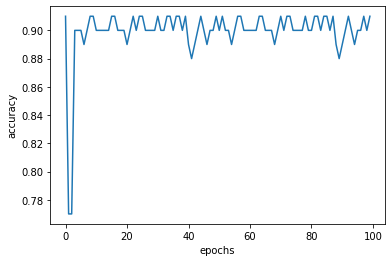

In [86]:
from sklearn.metrics import confusion_matrix,classification_report
acc=[]
model = Perceptron_Learning(2,0.001)
epochs = 1000
for i in range(0, epochs):
  model.fit_function(X_train,y_train)
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_test,y_pred)
  accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
  acc.append(accuracy)

plt.plot(acc)
plt.ylabel('accuracy')
plt.xlabel('epochs')
#plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


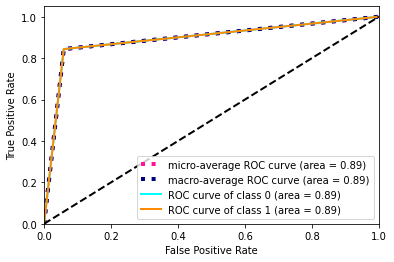

In [99]:
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(2):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


In [67]:
model = Perceptron_Learning(2,0.001)

In [68]:
model.fit_function(X_train,y_train)

In [69]:
y_pred = model.predict(X_test)

In [70]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

### Evaluation

In [87]:
cm

array([[64,  4],
       [ 5, 27]])

In [92]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[64  4]
 [ 5 27]]


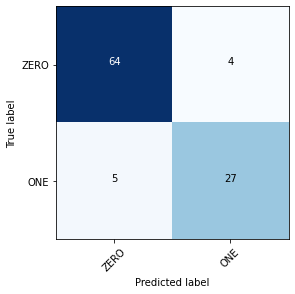

In [93]:
cm_plot_labels = ['ZERO', 'ONE']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

In [88]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])*100
print('Accuracy = ',accuracy,'%')

Accuracy =  91.0 %


### Visualization

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


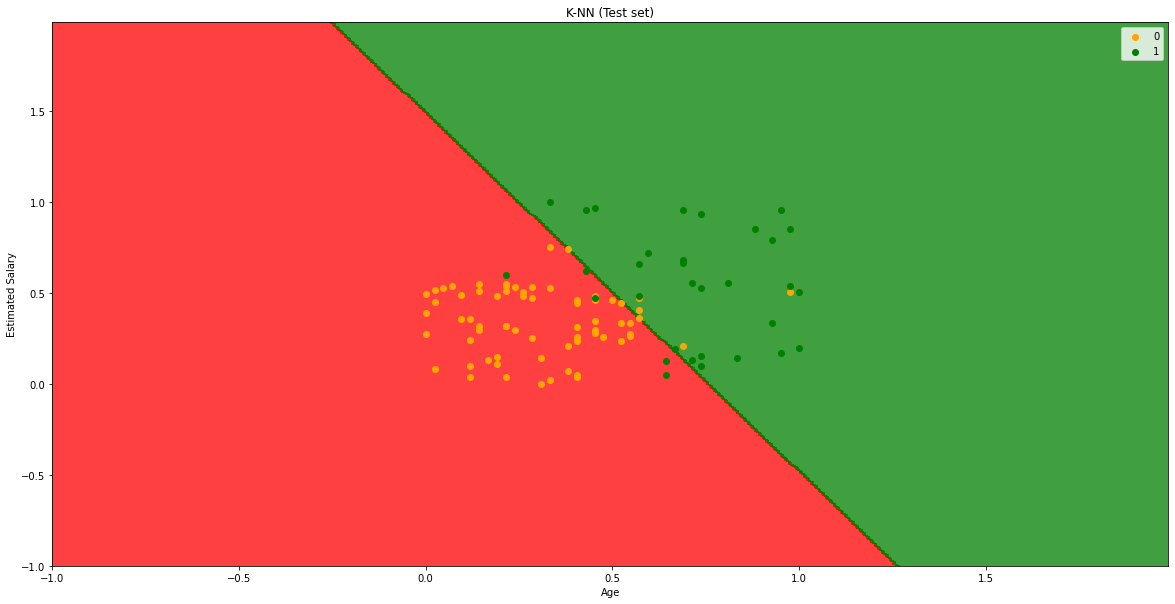

In [18]:
plt.figure(figsize=(20,10))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('orange', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()